# Creating CNN to classify numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

2025-02-15 19:50:50.641357: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-15 19:50:50.652004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739670650.664252   43647 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739670650.667777   43647 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-15 19:50:50.680553: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


In [4]:
num_of_samples=[]

In [5]:
cols = 5
num_classes = 10

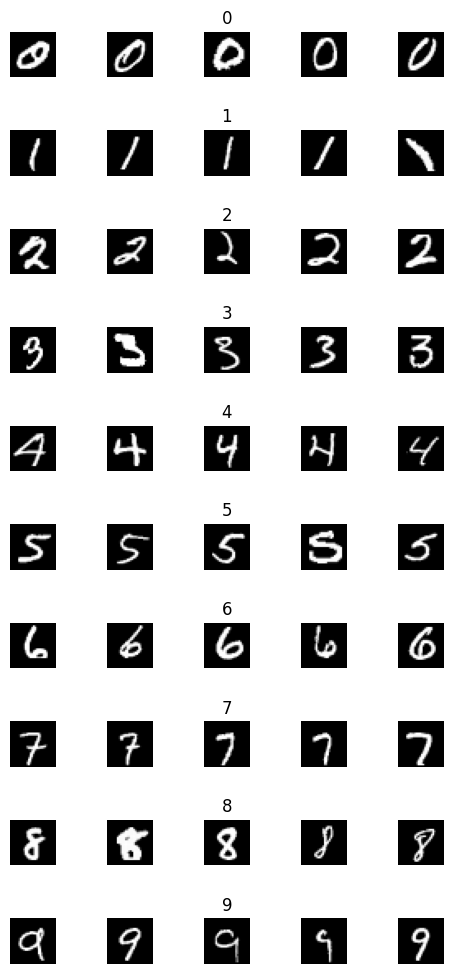

In [6]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


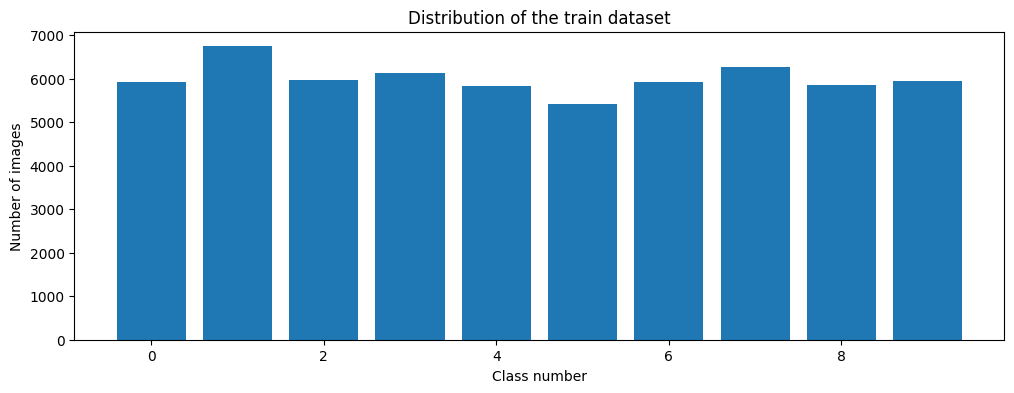

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
#define the leNet_model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.031), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [12]:
model = leNet_model()
print(model.summary())

/home/omargudino/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-15 19:50:53.894600: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.1069 - loss: 2.5684 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.1114 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.1123 - loss: 2.3017 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.1066 - loss: 2.3024 - val_accuracy: 0.1050 - val_loss: 2.3035
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.1138 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3034
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.1095 - loss: 2.3020 - val_accuracy: 0.1113 - val_loss: 2.3020
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.1069 - loss: 2.3028 - val_accuracy: 0.0978 - val_loss: 2.3039
Epoch 8/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.1086 - loss: 2.3024 - val_accu

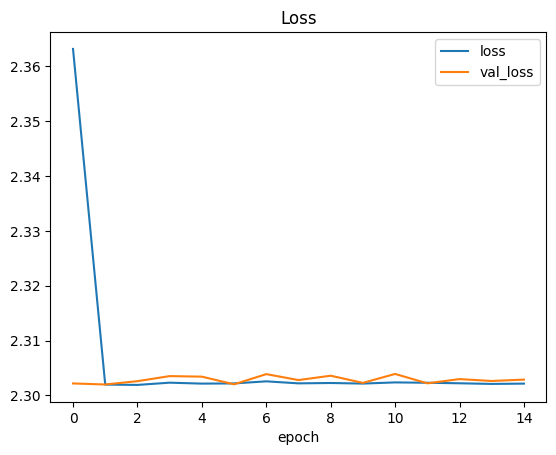

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

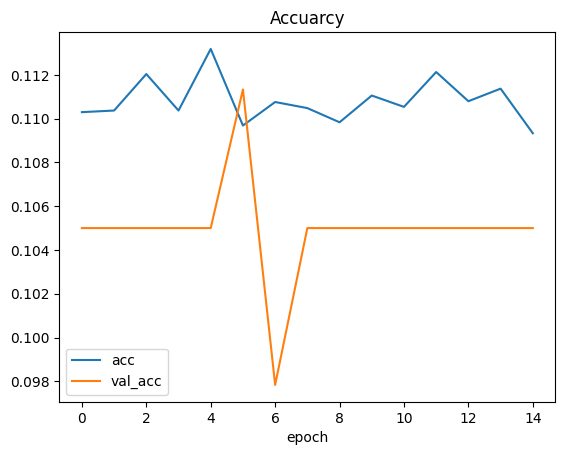

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuarcy')
plt.xlabel('epoch')
plt.show()

<Response [200]>


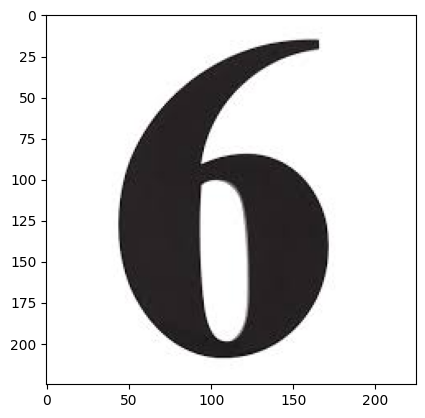

In [16]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHmav-cPmrJJfzbyTks9pDApQ9oE1pm2GeZd40qZlpsjmfK7UvVQ6d2zFz6RRtOE1RAL8&usqp=CAU'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)
plt.show()

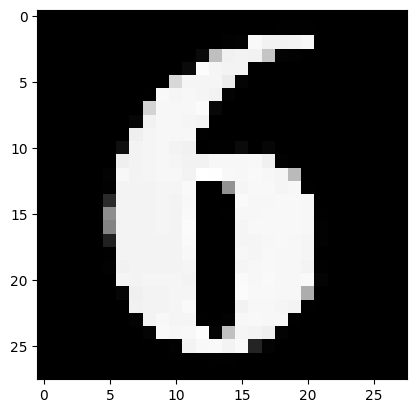

In [17]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
plt.show()

In [18]:
image = image/255
image = image.reshape(1, 28,28,1)
print(image)

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.00392157]
   [0.00392157]
   [0.00392157]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

In [19]:
prediction = np.argmax(model.predict(image), axis=-1)
print("Predicted digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted digit: [1]


In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Tes score: ', score[0])
print('Test accuracy', score[1])

Tes score:  2.3022735118865967
Test accuracy 0.11349999904632568


In [21]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


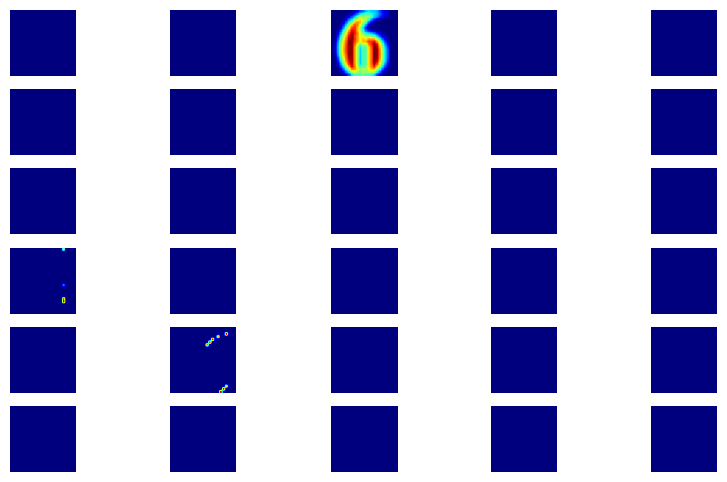

In [22]:
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')


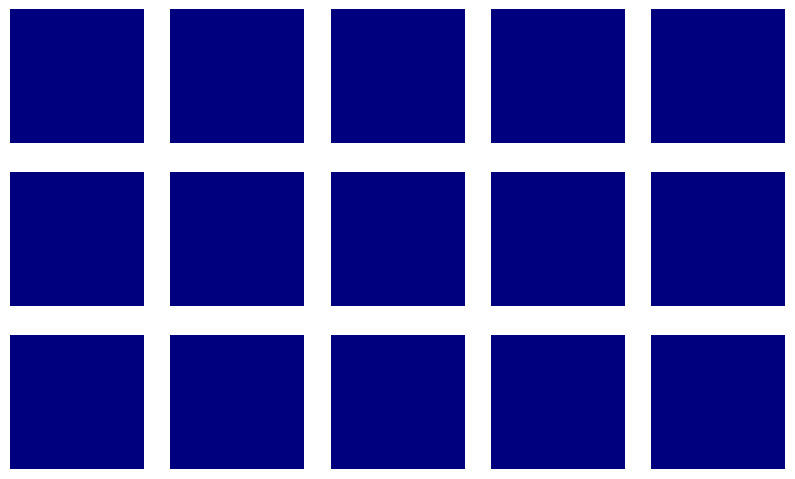

In [23]:
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
